## Homework 2: Wine Quality Prediction Using SGD
### Course: CS 474/574: Deep Learning/2022 Fall
### Due: 09/25/2022


Add your code to the following sections:

    ## add your code here
    #-----------------------

    #---------------------------------
    
Description: In this homework, you are going to practice cross-validation and implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use all function definitions given in the code (e.g., def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change the function names and input arguments. (deduct 5 points for doing this)

2. Evaluate (Cross-validation) the model trained using GD (20 points)

3. SGD implementation. 40 pts
   
4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)
5. Plot the loss curve of the SGD. (5 points)
6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

### Common mistakes
    
1. Call GD and SGD using the whole dataset

    -- GD and SGD are used to optimize the model (learn w); and we should call them using the training sets
   
2. Calculate gradient using the whole training set for SGD
    
    -- In SGD, update gradient only using mini-batches
  
3. Calculate the loss of each epoch using the average of all minibatches
    
    -- should use the w of the last mini-batch and the whole training set to calculate the loss  
   
4. Mix concepts of loss function and evaulation metrics
    -- loss function: for optimization purpose (gradient). We use the sum of square errors in this homework. L = 1/2 * sum(y_hat_i - y_i)^2
    
    -- evaluation metrics: mse and mae: mse = 1/m * sum(y_hat_i - y_i)^2, mae = 1/m * sum(abs(y_hat_i - y_i))

### 1. Load data, implement the model, loss function and GD 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation (20 points)

In [2]:
## 2.1 Split the dataset into training (70%) and test (30%) sets. (5 points)
from sklearn.model_selection import train_test_split

## add your code here
#-----------------------
x_train,x_test,y_train,y_test = train_test_split(X1, Y, test_size = 0.3, train_size = 0.7)

print(x_train.shape, x_test.shape)
#---------------------------------

(3428, 11) (1470, 11)


In [3]:
## 2.2 Model training using the training set and the GD function (5 points )
## add your code here
#-----------------------
w_star, loss_hist, w_hist = GD(x_train, y_train, lr = 1e-5)
#---------------------------------

0 loss: 39586.371907282286
1 loss: 35118.631092202995
2 loss: 31172.359120616384
3 loss: 27686.68571529441
4 loss: 24607.845906948693
5 loss: 21888.350640883007
6 loss: 19486.254197651793
7 loss: 17364.507126751803
8 loss: 15490.38471152174
9 loss: 13834.982148590334
10 loss: 12372.76865437044
11 loss: 11081.193620121749
12 loss: 9940.338740020441
13 loss: 8932.610745866541
14 loss: 8042.470008468962
15 loss: 7256.19081903766
16 loss: 6561.649652616898
17 loss: 5948.138147252363
18 loss: 5406.1979138567
19 loss: 4927.474628504469
20 loss: 4504.589156343582
21 loss: 4131.023719044847
22 loss: 3801.021349776975
23 loss: 3509.4970846714823
24 loss: 3251.959520792322
25 loss: 3024.441530541622
26 loss: 2823.439063682662
27 loss: 2645.8570929230664
28 loss: 2488.9618691997102
29 loss: 2350.3387501420825
30 loss: 2227.8549511642304
31 loss: 2119.626644573257
32 loss: 2023.9898991560683
33 loss: 1939.4750119503287
34 loss: 1864.7838362343912
35 loss: 1798.7697559914423
36 loss: 1740.419997928

In [4]:
## 2.3. calculating mse&mae values on the training set and test set, respectively. (10 points)

#training error
## add your code here
#-----------------------
def mse(w,x,y):
    m = x.shape[0]
    x = np.c_[np.ones((m, 1)), x]
    y_pred = np.dot(x,w)
    MeanSquaredError = (1/m) * np.sum(np.square(y_pred.reshape(m,) - y))
    return MeanSquaredError
    
def mae(w,x,y):
    m = x.shape[0]
    x = np.c_[np.ones((m, 1)), x]
    y_pred = np.dot(x,w)
    MeanAbsoluteError = (1/m) * np.sum(np.absolute(y_pred.reshape(m,) - y))
    return MeanAbsoluteError

mse_train = mse(w_star, x_train, y_train)
mae_train = mae(w_star, x_train, y_train)

print('training mse: {} and training mae:{}'.format(mse_train, mae_train))
#---------------------------------


## test error
## add your code here
#-----------------------

mse_test = mse(w_star, x_test, y_test)
mae_test = mae(w_star, x_test, y_test)

print('test mse: {} and test mae:{}'.format(mse_test, mae_test))
#---------------------------------

training mse: 0.7469473796488595 and training mae:0.6748368174123498
test mse: 0.7818629875665214 and test mae:0.6874088385151083


### 3. SGD implementation (40 points)
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

In [30]:
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach
    
        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches
        
        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)    #(12,1) values in [0, 1)
    w_hist = [] # (epoch,12) 
    loss_hist = []            # (epoch,)
   
    
    ## add your code here
    #-----------------------
    for i in range(epoch):
        #(1) Shuffle data (X and Y) at the beginning of each epoch. (5 points)
        np.random.shuffle(X)
        np.random.shuffle(Y)
        
        #(2) go through all minibatches and update w. (30 points)
        for b in range(int(m/batch_size)): 
            # prepare the b mininath X_batch and Y_batch. 10 points
            idx = np.arange(b*32, b*32+32)
            m_batch = len(idx)
            X_batch = X[idx]
            Y_batch = Y[idx]
            
            #prepare A_batch and b_batch. 10 points
            b_batch = np.reshape(Y_batch, [Y_batch.shape[0],1])
            A_batch = np.c_[np.ones((m_batch, 1)), X_batch]
            
            
            #gradient calcualation and w update. 10 points
            gradient = A_batch.T.dot(np.dot(A_batch, w)-b_batch)
            w = w - lr*gradient
            #print(i, b_batch.shape, X_batch.shape, A_batch.shape)

            
            
        ## (3) Save the loss and current weight for each epoch. 5 points
        l = loss(w, X, Y)
        w_hist.append(w)
        loss_hist.append(l)
        print('Epoch', i, 'Loss: ', l)
        
        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
    #---------------------------------
    
    w_star = w
    return w_star, w_hist, loss_hist  

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)

In [55]:
batch_size = 32
n_epochs = 100

#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(x_train, y_train, lr = 1e-2, batch_size = batch_size, epoch = n_epochs)

## add your code here
#-----------------------
#(1) print out the predicted wine quality values and the true quality 
# values of the first 10 data samples in the test dataset.  5 points
Y_hat = predict(x_test, w_star_SGD)
print(Y_hat[0:10])
print(y_test[0:10])

#(2) mse and mae of the training set. 5 points

mse_train = mse(w_star_SGD, x_train, y_train)
mae_train = mae(w_star_SGD, x_train, y_train)

print('training mse: {} and training mae:{}'.format(mse_train, mae_train))
#(3)mse and mae of the test set. 5 points


mse_test = mse(w_star_SGD, x_test, y_test)
mae_test = mae(w_star_SGD, x_test, y_test)

print('test mse: {} and test mae:{}'.format(mse_test, mae_test))
#---------------------------------

Epoch 0 Loss:  1462.4572154362857
Epoch 1 Loss:  1506.4924578792645
Epoch 2 Loss:  1420.931100240504
Epoch 3 Loss:  1374.8198533639265
Epoch 4 Loss:  1364.3782359072957
Epoch 5 Loss:  1351.9858618838748
Epoch 6 Loss:  1356.5196771166202
Epoch 7 Loss:  1339.7629141148052
Epoch 8 Loss:  1342.0371897685104
Epoch 9 Loss:  1352.6235825925762
Epoch 10 Loss:  1339.9976888002789
Epoch 11 Loss:  1340.964245828318
Epoch 12 Loss:  1343.6271694098568
Epoch 13 Loss:  1341.585684979913
Epoch 14 Loss:  1334.8924412411252
Epoch 15 Loss:  1331.6740268356202
Epoch 16 Loss:  1339.213750713684
Epoch 17 Loss:  1335.0663526945405
Epoch 18 Loss:  1334.84901898525
Epoch 19 Loss:  1336.0307848144382
Epoch 20 Loss:  1331.9142773318476
Epoch 21 Loss:  1333.1877875389896
Epoch 22 Loss:  1329.4061955316229
Epoch 23 Loss:  1330.986178299959
Epoch 24 Loss:  1334.9734170127917
Epoch 25 Loss:  1329.8093099084301
Epoch 26 Loss:  1327.6910881805798
Epoch 27 Loss:  1330.3116106755444
Epoch 28 Loss:  1333.447422098175
Epo

### 5. Plot the loss curve of the SGD. (5 points)

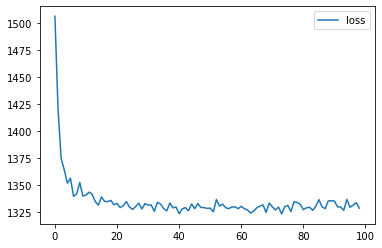

In [60]:
## add your code here
#-----------------------
plt.plot(np.arange(n_epochs-1), loss_hist_SGD[1:], label = "loss")
plt.legend()


#---------------------------------

### 6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

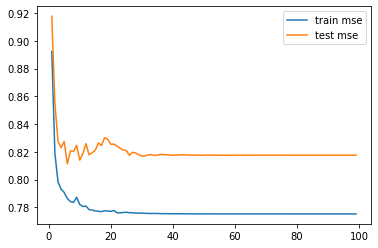

In [56]:
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)

## add your code here
#-----------------------
for i in np.arange(len(w_hist_SGD)):

    mse_SGD_train[i] = mse(w_hist_SGD[i], x_train, y_train)
    #mae_train = mae(w_star_SGD, x_train, y_train)
    
    mse_SGD_test[i] = mse(w_hist_SGD[i], x_test, y_test)
    #mae_test = mae(w_star_SGD, x_test, y_test)


plt.plot(np.arange(n_epochs-1)+1, mse_SGD_train[1:], label = "train mse")
plt.plot(np.arange(n_epochs-1)+1, mse_SGD_test[1:], label = "test mse")
plt.legend()






#---------------------------------